# Регрессионный анализ 2025

**Цель работы:**

Изучение алгоритмов и методов регрессии на практике.

**Вариант №8**

### Часть 1. Простая линейная регрессия

Подключение библиотек


In [2]:
import pandas as pd
import numpy as np

Импорт данных

In [76]:
df = pd.read_excel('./regression.xlsx', sheet_name="var8")

In [77]:
df.head(10)


,x1,x2,y
0,-1.6557,1.2046,2.7779
1,-0.4617,1.4942,0.5949
2,0.8234,-1.0241,-1.4140
3,0.9009,0.4401,0.1049
4,0.5114,-1.7530,-1.3871
5,1.5160,1.1335,1.0763
6,0.4547,1.5151,1.0435
7,-1.2990,-0.1289,0.2974
8,-0.5026,-0.2679,-0.3645
9,0.8932,-0.2757,0.9018


**Обучение модели**

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['y']
X = df['x1']

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train)

predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))


Сравнение и рассчёт показателей

In [18]:
from sklearn import metrics

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predictions_valid):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predictions_valid):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predictions_valid):.4f}')

,Actual,Predicted
0,-0.395571,0.020166
1,0.893850,-0.032986
2,0.633611,0.773450
3,-1.155219,0.246771
4,1.176699,0.356892
...,...,...
245,0.784664,0.384325
246,0.993012,-0.167211
247,-1.414032,0.123932
248,1.670966,0.966218


Mean Absolute Error: 0.8563
Mean Squared Error: 1.0575
Root Mean Squared Error: 1.0283
R2 metric: 0.0952


Визуализация

a: -0.3118
b: 0.3807


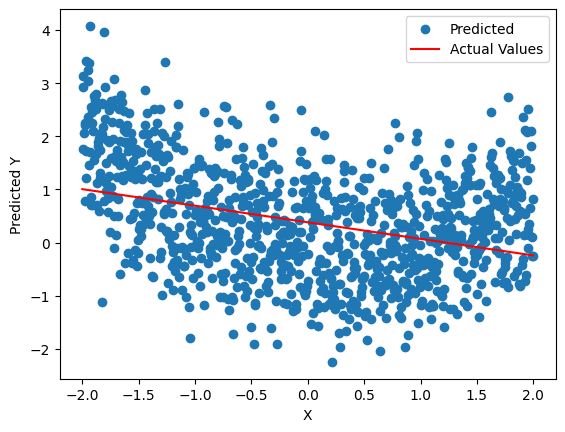

In [19]:
import matplotlib.pyplot as plt
# получение коэффициента регрессии
a = model.coef_
b = model.intercept_

print(f'a: {a[0]:.4f}\nb: {b:.4f}')

plt.scatter(df['x1'], df['y'], label="Predicted") # зависимость целевого столбца от конкретного столбца х1 (точечный график)
# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot([-2, 2], [a*(-2) + b, a*2 + b], "r", label="Actual Values")
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.legend()

Построим график с истинными предсказаниями в виде красной линии под углом 45 градусов

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


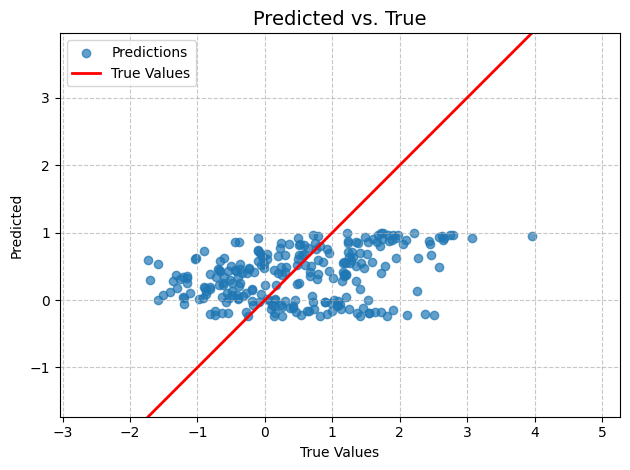

In [20]:
def pred_vs_true(true_values, predictions):

	plt.figure()

	for key in predictions:
		plt.scatter(true_values, predictions[key], alpha=0.7, label=key)

		min_val = min(min(true_values), min(predictions[key]))
		max_val = max(max(true_values), max(predictions[key]))
	
	plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='True Values')

	plt.xlabel('True Values')
	plt.ylabel("Predicted")

	plt.title('Predicted vs. True', fontsize=14)

	plt.legend()

	plt.grid(True, linestyle='--', alpha=0.7)

	plt.axis('equal')
	plt.xlim([min_val, max_val])
	plt.ylim([min_val, max_val])

	plt.tight_layout()
	plt.show()

pred_vs_true(y_valid, {"Predictions": predictions_valid})

Построим график с разницей предсказанного и истинного значения

<Axes: xlabel='Разница', ylabel='Частота значения'>

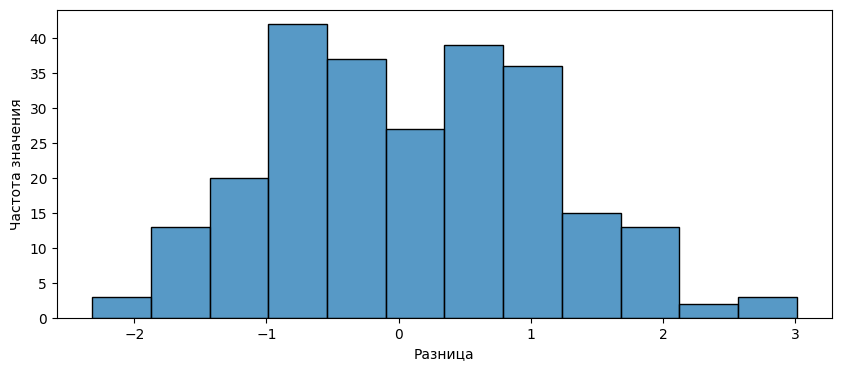

In [21]:
import seaborn as sns

diff = df_match['Actual'] - df_match['Predicted']

fig, axes = plt.subplots(
	1,
	1,
	figsize=(10, 4)
)

axes.set_xlabel("Разница")
axes.set_ylabel("Частота значения")

sns.histplot(diff, bins='auto', ax=axes)

По гистограмме видно, что разница между значениями чаще всего находится в промежутках (-1;1.5)


Повторим процесс для столбца x2

In [22]:
y = df['y']
X = df['x2']

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train)

predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))

In [23]:
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predictions_valid):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predictions_valid):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predictions_valid):.4f}')

,Actual,Predicted
0,-0.395571,1.267424
1,0.893850,-0.170788
2,0.633611,0.106054
3,-1.155219,-0.532940
4,1.176699,1.133324
...,...,...
245,0.784664,1.120814
246,0.993012,0.999788
247,-1.414032,-0.183275
248,1.670966,-0.517545


Mean Absolute Error: 0.6920
Mean Squared Error: 0.7915
Root Mean Squared Error: 0.8896
R2 metric: 0.3228


a: 0.5521
b: 0.3821


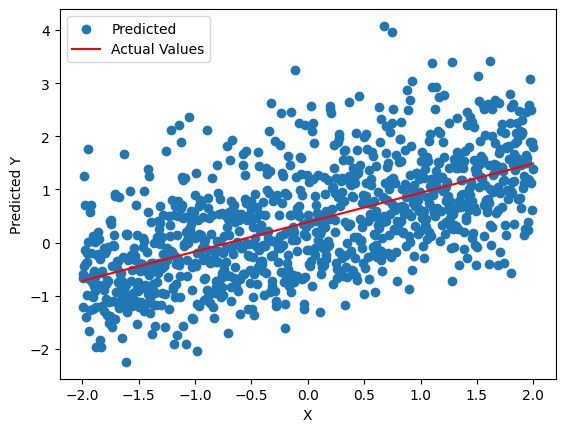

In [24]:
# получение коэффициента регрессии
a = model.coef_
b = model.intercept_

print(f'a: {a[0]:.4f}\nb: {b:.4f}')

plt.scatter(df['x2'], df['y'], label="Predicted") # зависимость целевого столбца от конкретного столбца х1 (точечный график)
# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot([-2, 2], [a*(-2) + b, a*2 + b], "r", label="Actual Values")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.legend()

Построим график с истинными предсказаниями в виде красной линии под углом 45 градусов

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


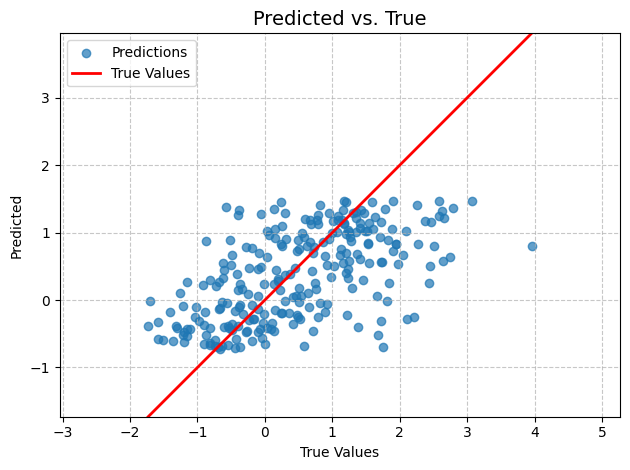

In [25]:
pred_vs_true(y_valid, {"Predictions": predictions_valid})

Построим график с разницей предсказанного и истинного значения

<Axes: xlabel='Разница', ylabel='Частота значения'>

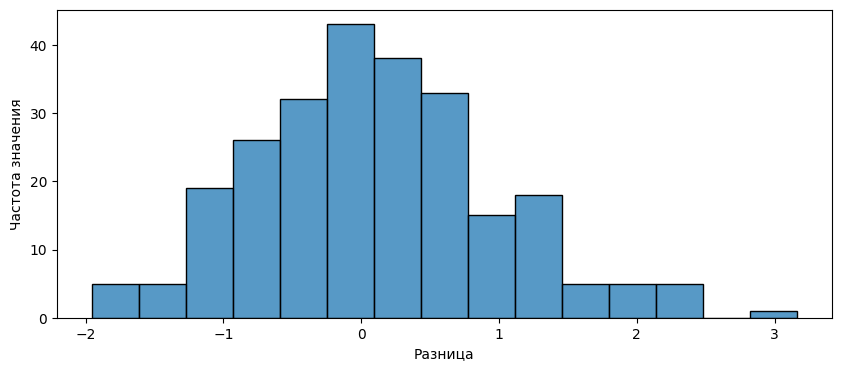

In [27]:
diff = df_match['Actual'] - df_match['Predicted']

fig, axes = plt.subplots(
	1,
	1,
	figsize=(10, 4)
)

axes.set_xlabel("Разница")
axes.set_ylabel("Частота значения")

sns.histplot(diff, bins='auto', ax=axes)

По гистограмме видно, что разница между значениями редко выходит за пределы (-1;1).

### Выводы

Линейная регрессия лучше подходит для обучения модели на столбце x2, так как значение R2: 0.32 > 0.1

 ### Часть 2. Полиноминальная регрессия

Для обучения модели на основе полиномиальной регрессии был выбран столбец x1, распределение которого на графике похоже на полином некоторой степени.

Intercept: -0.10109305142981173
Coefficients: [ 0.         -0.2985361   0.37138527]


,Actual,Predicted
0,-0.3956,0.0502
1,0.8939,0.1565
2,0.6336,0.8640
3,-1.1552,-0.1608
4,1.1767,-0.1217
...,...,...
245,0.7847,-0.0976
246,0.9930,0.5209
247,-1.4140,-0.0951
248,1.6710,1.7687


MAE: 0.7272
R2: 0.3193


c:\Users\kragg\Documents\projects\DataAnalysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


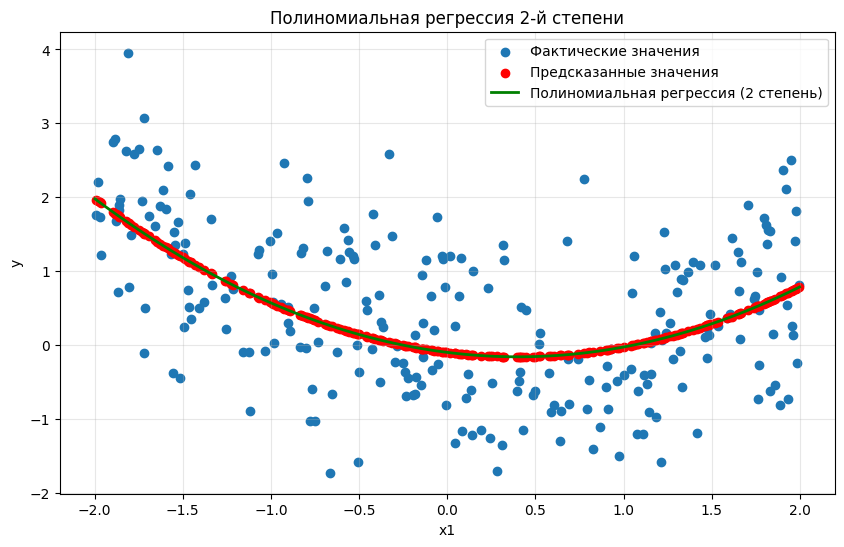

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

def poly(degree):
    y = df['y']
    X = df['x1']

    X_train,X_valid,y_train,y_valid = train_test_split(
        X, y,
        test_size=0.25,
        random_state=0
    )

    poly_features = PolynomialFeatures(degree)
    X_train_poly = poly_features.fit_transform(pd.DataFrame(X_train))

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    print(f'Intercept: {lin_reg.intercept_}')
    print(f'Coefficients: {lin_reg.coef_}')

    X_valid_poly = poly_features.fit_transform(pd.DataFrame(X_valid))
    predictions_valid = lin_reg.predict(X_valid_poly)

    df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
    display(df_match)

    # metrics
    print(f"MAE: {mean_absolute_error(y_valid, predictions_valid):.4f}")
    print(f"R2: {r2_score(y_valid, predictions_valid):.4f}")

    # plot
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_range_pred = lin_reg.predict(x_range_poly)

    plt.figure(figsize=(10, 6))

    plt.scatter(X_valid, y_valid, label='Фактические значения')
    plt.scatter(X_valid, predictions_valid, color='red', label='Предсказанные значения')
    plt.plot(x_range, y_range_pred, color='green', linewidth=2, label=f'Полиномиальная регрессия ({degree} степень)')

    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title(f'Полиномиальная регрессия {degree}-й степени')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

poly(2)

Повторим действия для степени полинома 5.

Intercept: -0.04218048296385973
Coefficients: [ 0.         -0.39175388  0.23040632  0.16251291  0.04058148 -0.04358613]


,Actual,Predicted
0,-0.3956,0.0465
1,0.8939,0.1696
2,0.6336,0.7322
3,-1.1552,-0.1543
4,1.1767,-0.0707
...,...,...
245,0.7847,-0.0376
246,0.9930,0.5192
247,-1.4140,-0.1157
248,1.6710,1.9514


MAE: 0.7291
R2: 0.3229


c:\Users\kragg\Documents\projects\DataAnalysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


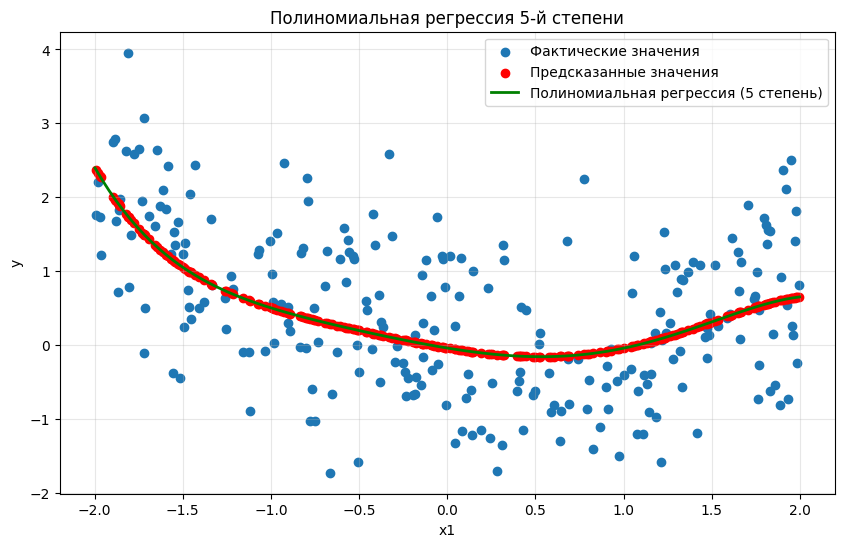

In [79]:
poly(5)

### Выводы

Метод полиномиальной регрессии второй степени оказался более эффективным по сравнению с линейной регрессией.

R2: 0.32 > 0.1

При этом пятая степень полинома показала лучшие результаты:

R2: 0.322 > 0.31

При степени полинома, равной 1 показатель R2 сравним с таким же показателем у линейной регрессии.

При степени полинома выше 5, показтель R2 становится примерно равным 0.31 и постепенно падает(модель переобучена - подстраивается под шум данных и плохо работает на тестовой выборке).

### Часть 3. Решение задачи регрессии различными методами

In [81]:
df = pd.read_csv("salary.csv")
df.head(10)

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.1897,25,87.5597,62,3.7087,25987.3340,2556.8216,PhD,Chicago,Finance,Single,Yes,Yes,106233.8335
1,69,51901.8974,39,70.8084,36,7.0828,22134.8990,725.1805,High School,Houston,Retail,Single,No,Yes,87205.2910
2,46,38605.4093,4,63.3250,77,5.1292,47106.0684,12659.3596,PhD,Los Angeles,Finance,Married,Yes,No,69369.2835
3,32,49949.7370,20,78.2155,33,19.3156,15868.3288,12369.7760,Bachelor,Los Angeles,IT,Married,Yes,No,76587.1170
4,60,48965.2901,13,74.4291,48,5.6549,15734.6333,4792.0952,Bachelor,Phoenix,IT,Married,No,No,71023.1488
5,25,11326.7686,3,73.0228,39,4.8792,11916.7440,6431.8359,Bachelor,Los Angeles,IT,Single,No,Yes,49665.6096
6,38,41579.4971,22,87.1631,49,11.7061,33558.5890,12271.3305,PhD,Chicago,Retail,Single,No,Yes,92451.8668
7,56,54713.0560,19,76.6714,38,9.2241,32785.0437,4876.9065,Bachelor,New York,Retail,Single,Yes,Yes,77558.7556
8,36,43636.7665,14,77.6357,72,1.1345,40287.7956,5796.9293,Master,Phoenix,Healthcare,Married,Yes,No,70917.6491
9,40,40306.8596,28,71.7295,58,7.0962,9083.2125,12941.3844,Master,New York,IT,Married,No,No,83196.2152


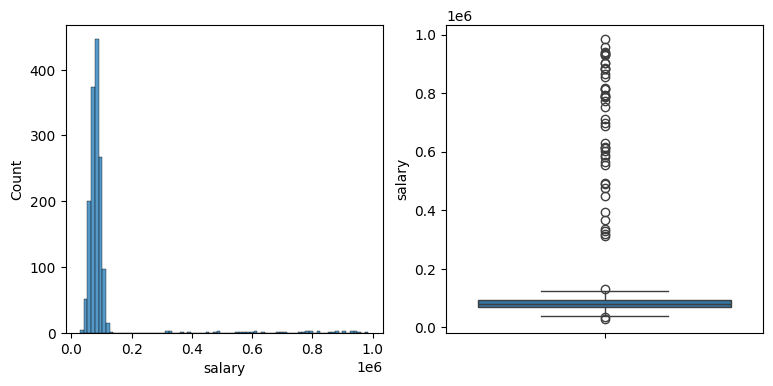

In [52]:
import seaborn as sns

def draw_data(data):
    fig, axes = plt.subplots(
        1,
        2,
        figsize=(9, 4)
    )

    sns.histplot(data=data, bins='auto', ax=axes[0])
    sns.boxplot(data=data, ax=axes[1])

draw_data(df.salary)

На графике видно значительное число выбросов, которые стоит обработать.

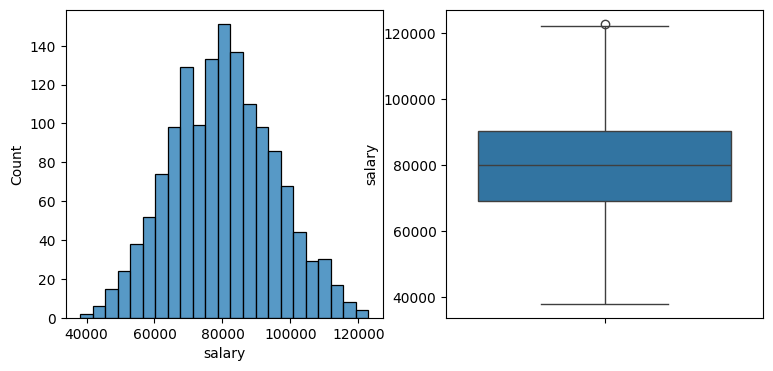

In [53]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(df.salary)

df.salary = df.salary[~outliers]
draw_data(df.salary)

Построим матрицу диаграм рассеяния по всем числовым значениям

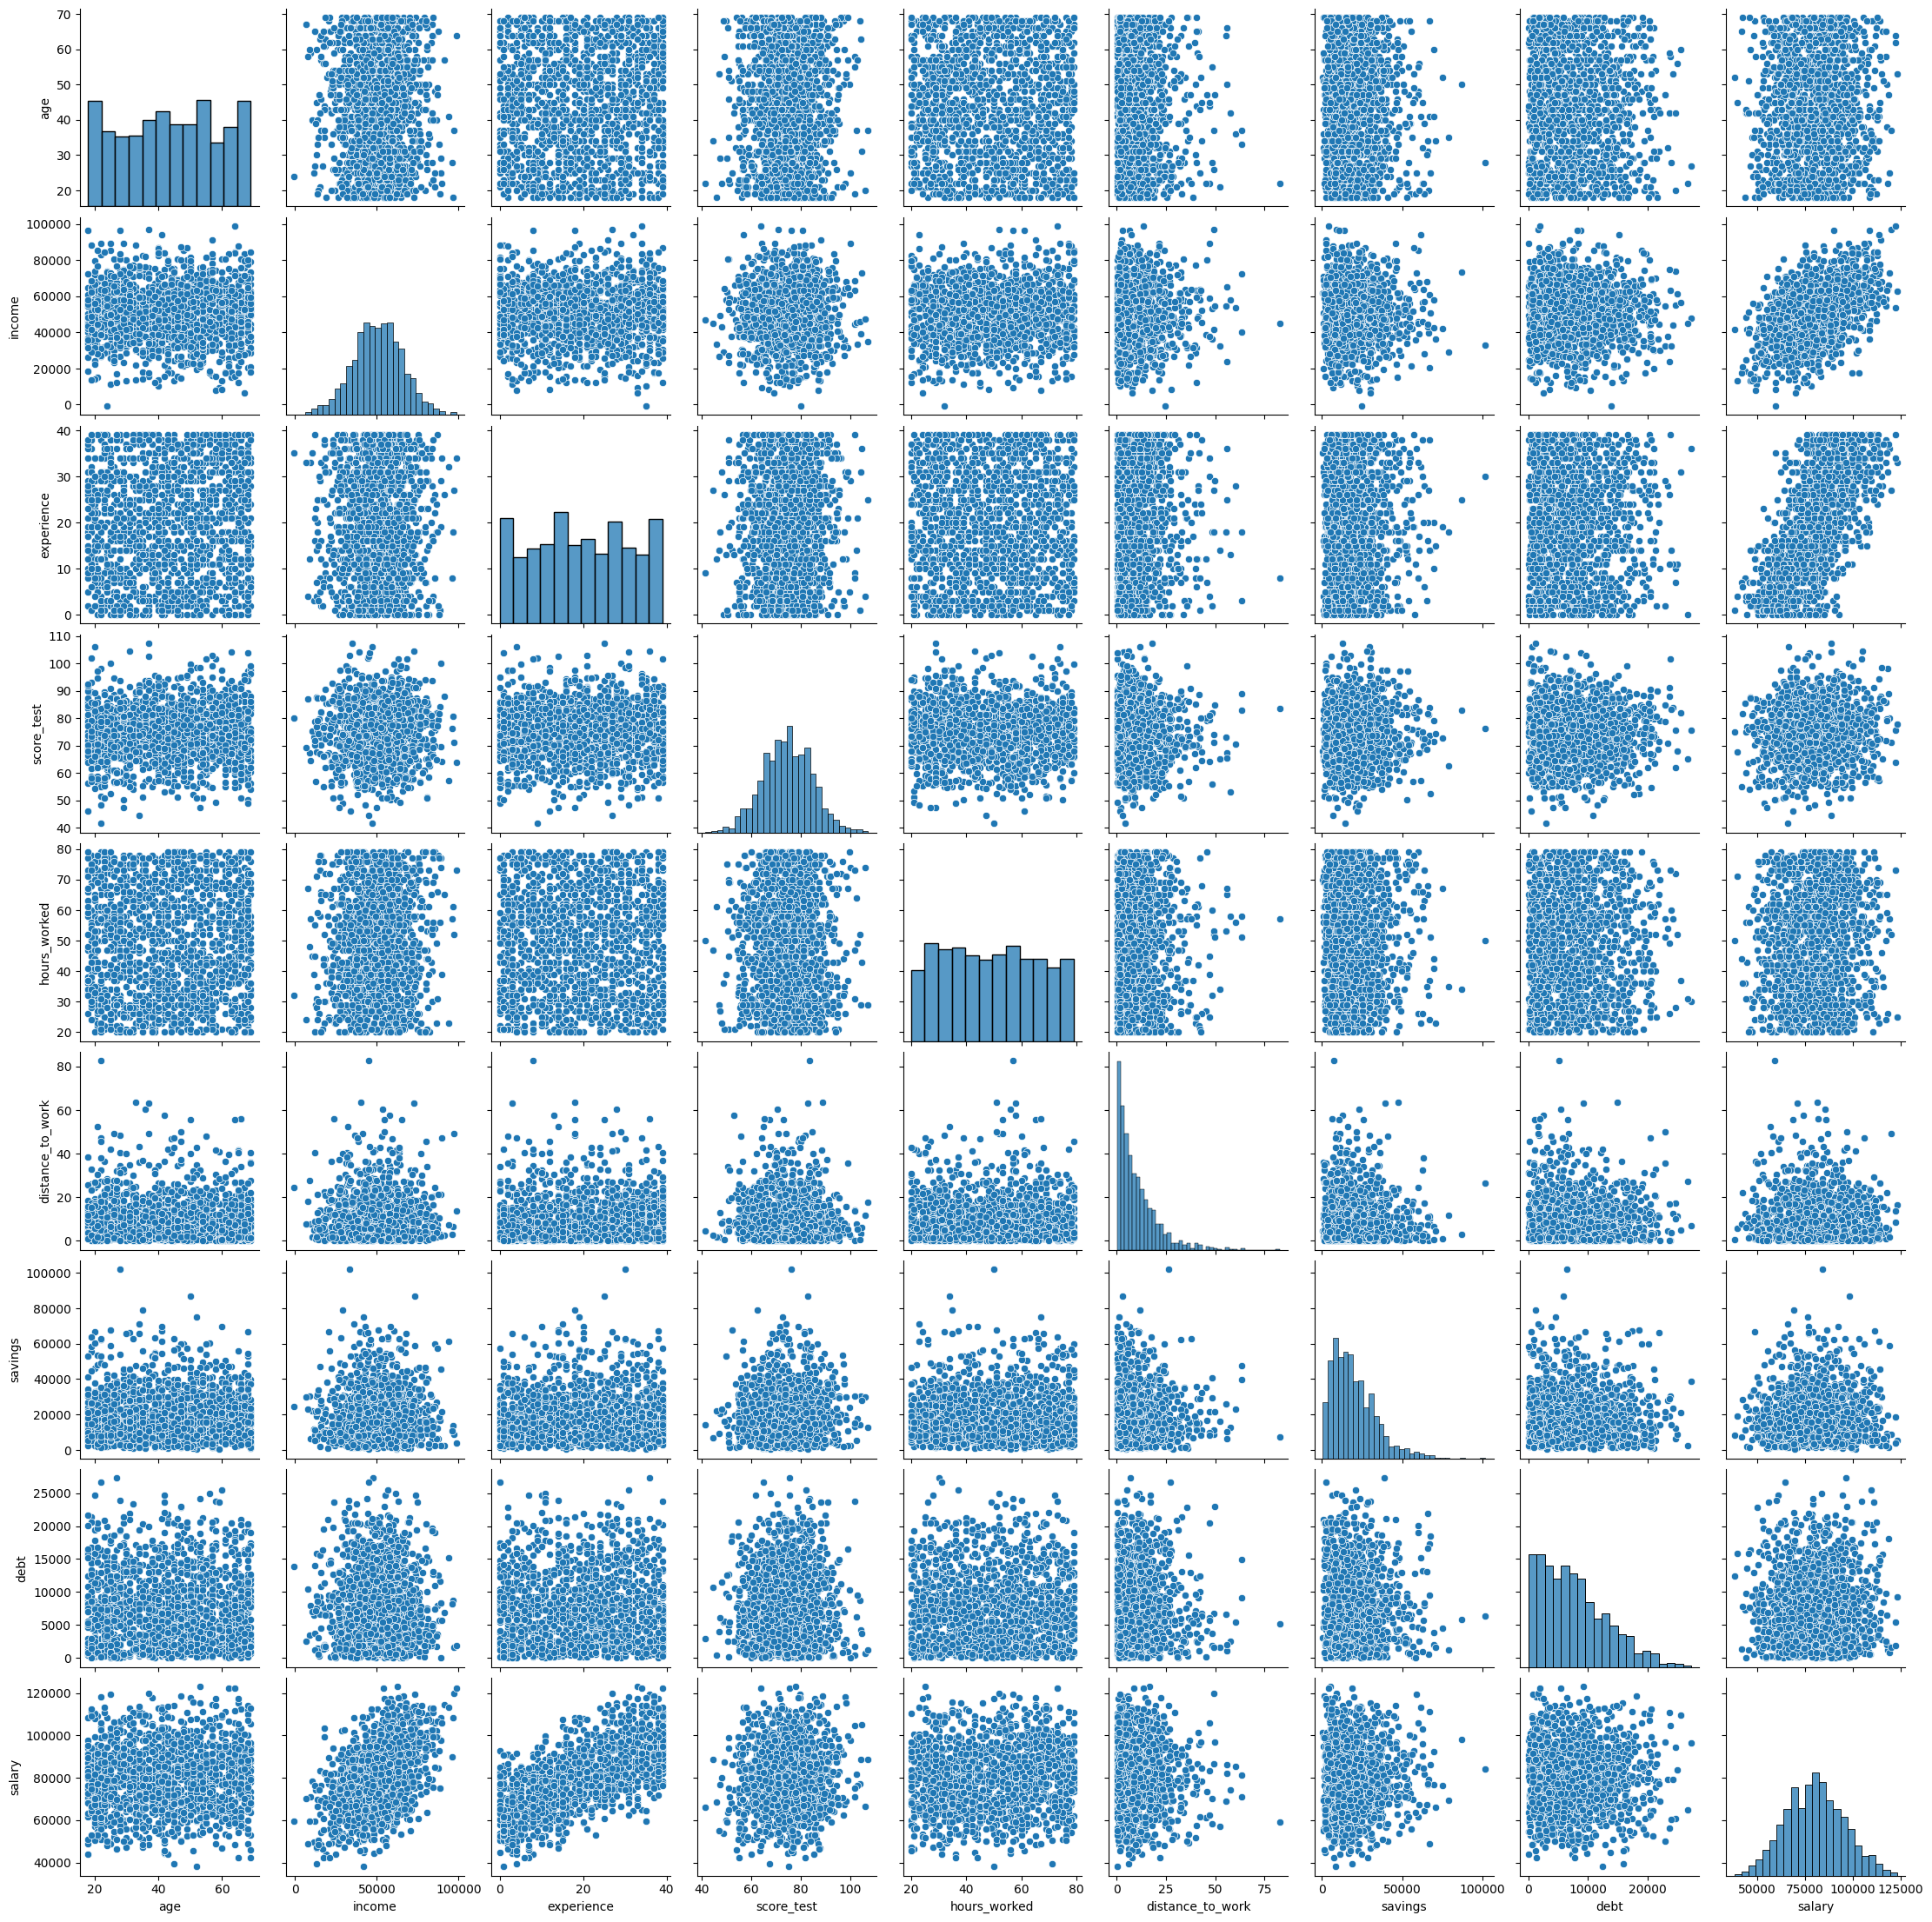

In [54]:
sns.pairplot(df)

Заполним пропуски в столбце salary нулями

In [56]:
df = df.fillna(0)

Выполним обучение модели линейной регрессии, предварительно масштабировав методом StandardScaler

,Actual,Predicted
0,48262.103163,46461.514794
1,83196.215231,78983.301565
2,76384.964261,69705.465775
3,79451.011331,84026.868917
4,88054.579652,85210.257380
...,...,...
370,70061.210178,71277.942759
371,113672.108989,95888.320556
372,75683.108135,73820.360793
373,100968.830571,97757.263134


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


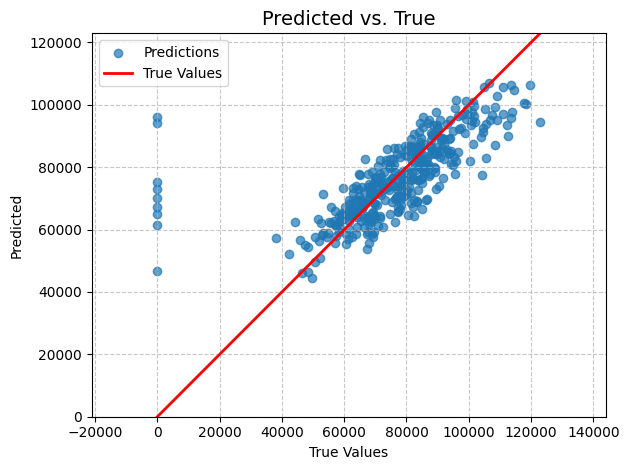

,Metric,Linear Regression
0,MAE,8059.6594
1,MSE,193948047.2791
2,RMSE,13926.5232
3,R2,0.4894


In [57]:
from sklearn.preprocessing import OrdinalEncoder

y = df['salary']
# oe = OrdinalEncoder()

X = df.drop('salary', axis=1).select_dtypes(include=[np.number])
# for col in df.select_dtypes(include='object').columns:
# 	X[col] = oe.fit_transform(pd.DataFrame(df[col]))

def get_metrics(actual_values, predictions: dict):
	res = pd.DataFrame()

	res['Metric'] = ["MAE", "MSE", "RMSE", "R2"]

	for key in predictions:
		mae = metrics.mean_absolute_error(actual_values, predictions[key])
		mse = metrics.mean_squared_error(actual_values, predictions[key])
		rmse = metrics.root_mean_squared_error(actual_values, predictions[key])
		r2 = metrics.r2_score(actual_values, predictions[key])

		res[key] = [mae, mse, rmse, r2]

	pd.options.display.float_format = '{:.4f}'.format
	display(res)

X_train,X_valid,y_train,y_valid = train_test_split(
	X, y,
	test_size=0.25,
	random_state=0
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions_valid = model.predict(X_valid_scaled)

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)

pred_vs_true(y_valid, {"Predictions": predictions_valid})

get_metrics(y_valid, {"Linear Regression": predictions_valid})

In [58]:
def coeff(model):
	coefficients_df = pd.DataFrame({
		'feature': X.columns.tolist(),  # названия признаков
		'coefficient': model.coef_      # коэффициенты модели
	})

	# Сортируем по абсолютному значению коэффициентов для оценки важности
	coefficients_df['abs_coefficient'] = np.abs(coefficients_df['coefficient'])
	coefficients_df = coefficients_df.sort_values('abs_coefficient', ascending=False).reset_index(drop=True)

	print("Коэффициенты признаков:")
	display(coefficients_df)

coeff(model)

Коэффициенты признаков:


,feature,coefficient,abs_coefficient
0,experience,9542.3422,9542.3422
1,income,7423.1168,7423.1168
2,score_test,955.1828,955.1828
3,debt,-768.1726,768.1726
4,hours_worked,311.9094,311.9094
5,distance_to_work,-213.4794,213.4794
6,savings,29.0720,29.0720
7,age,22.4252,22.4252


<BarContainer object of 8 artists>

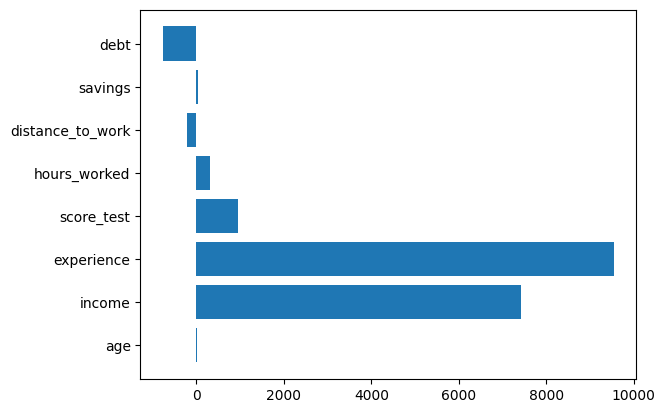

In [59]:
pd.DataFrame({"Feature":X.columns.to_list(),"Coefficients":model.coef_.flatten().T})
plt.barh(X.columns.to_list(), model.coef_.flatten())

На графике видно, что наибольшую значимость с большим отрывом имеют критерии experience и income

Выполним обучение модели по методу k-ближайших соседей. Подберём значение k = 20.

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

y = df['salary']

oe = OrdinalEncoder()

X = df.drop('salary', axis=1)
for col in df.select_dtypes(include='object').columns:
    X[col] = oe.fit_transform(pd.DataFrame(df[col]))

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)

predicted = model.predict(X_valid)

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predicted }).reset_index(drop=True)
display(df_match)

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predicted):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predicted):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predicted)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predicted):.4f}')


,Actual,Predicted
0,48262.1032,69605.3461
1,83196.2152,76435.9453
2,76384.9643,117010.2910
3,79451.0113,124031.1912
4,88054.5797,77875.8072
...,...,...
370,70061.2102,116161.3896
371,113672.1090,122535.5442
372,75683.1081,81998.7476
373,100968.8306,82366.7681


Mean Absolute Error: 36485.4253
Mean Squared Error: 7012515772.6540
Root Mean Squared Error: 83740.7653
R2 metric: -0.0396


,Actual,Linear Regression,K-Neighbors Regression
0,48262.1032,46461.5148,69605.3461
1,83196.2152,78983.3016,76435.9453
2,76384.9643,69705.4658,76191.3357
3,79451.0113,84026.8689,81270.0590
4,88054.5797,85210.2574,77875.8072
...,...,...,...
370,70061.2102,71277.9428,69219.3746
371,113672.1090,95888.3206,83163.4057
372,75683.1081,73820.3608,81998.7476
373,100968.8306,97757.2631,82366.7681


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


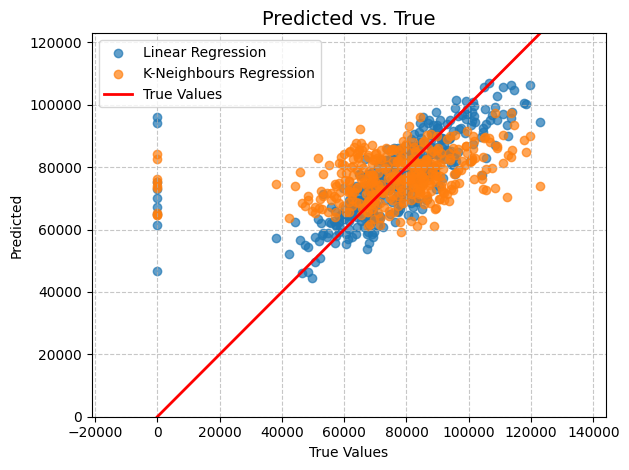

In [61]:
df_match = pd.DataFrame({'Actual': y_valid, 'Linear Regression': predictions_valid, 'K-Neighbors Regression': predicted }).reset_index(drop=True)
display(df_match)

# sns.scatterplot(df_match)
pred_vs_true(y_valid, {"Linear Regression": predictions_valid, "K-Neighbours Regression": predicted})

На графике видно, что значения, полученные с помощью Linear Regression, ближе к фактическим. Это также подтверждается значениями R2:

0.50 > 0.13

### Выводы

В ходе выполнения лабораторной работы были получены навыки обучений моделей машинного обучения методами линейной регрессии, полиномиальной регрессии, а также методом k-ближайших соседей.

Было выполнено обучение моделей на различных входных данных, вычислены метрики, пострены графики, проведено сравнение различных методов.

Для датасета с параметрами x1 и x2 были определены оптимальные методы обучения:

Для x1: Полиномимиальная регрессия пятой степени
Для x2: Линейная регрессия
Метрики R2 для x1 и x2 обе равны 0.32

Для датасета с множественными параметрами salary.csv были определены наиболее значимые. Было предсказано значение зарплаты на основе таких числовых параметров, как опыт работы, доход, возраст и др.

Метрика R2 = 0.50 для линейной регрессии и 0.13 для метода k-ближайших соседей